In [1]:
import numpy as np
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, lfilter
import features as ft
from scipy.signal import freqz
import datetime
from scipy.stats import norm
import re

In [2]:
# Path to the directory containing the data files
paths = os.listdir("D:/Popocatepetl/processed_data/2023")
# paths = os.listdir("C:\\Users\\javie\\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\\MaestriaEnCienciaDeDatos\\EstanciaDeInvestigacion\\Popocatepelt\\PopocatepetlVolcano\\data") 

In [6]:
# Filter files for a specific month
month = 'CN_PPPP_HHZ_2023_05'
with_s = [x for x in paths if re.match(r'^{}'.format(month), x)]
with_s.sort()
print(with_s)

['CN_PPPP_HHZ_2023_05_01.seed', 'CN_PPPP_HHZ_2023_05_02.seed', 'CN_PPPP_HHZ_2023_05_03.seed', 'CN_PPPP_HHZ_2023_05_04.seed', 'CN_PPPP_HHZ_2023_05_05.seed', 'CN_PPPP_HHZ_2023_05_06.seed', 'CN_PPPP_HHZ_2023_05_07.seed', 'CN_PPPP_HHZ_2023_05_08.seed', 'CN_PPPP_HHZ_2023_05_09.seed', 'CN_PPPP_HHZ_2023_05_10.seed', 'CN_PPPP_HHZ_2023_05_11.seed', 'CN_PPPP_HHZ_2023_05_12.seed', 'CN_PPPP_HHZ_2023_05_13.seed', 'CN_PPPP_HHZ_2023_05_14.seed', 'CN_PPPP_HHZ_2023_05_15.seed', 'CN_PPPP_HHZ_2023_05_16.seed', 'CN_PPPP_HHZ_2023_05_17.seed', 'CN_PPPP_HHZ_2023_05_18.seed', 'CN_PPPP_HHZ_2023_05_19.seed', 'CN_PPPP_HHZ_2023_05_20.seed', 'CN_PPPP_HHZ_2023_05_21.seed', 'CN_PPPP_HHZ_2023_05_22.seed', 'CN_PPPP_HHZ_2023_05_23.seed', 'CN_PPPP_HHZ_2023_05_24.seed', 'CN_PPPP_HHZ_2023_05_25.seed', 'CN_PPPP_HHZ_2023_05_26.seed', 'CN_PPPP_HHZ_2023_05_27.seed', 'CN_PPPP_HHZ_2023_05_28.seed', 'CN_PPPP_HHZ_2023_05_29.seed', 'CN_PPPP_HHZ_2023_05_30.seed', 'CN_PPPP_HHZ_2023_05_31.seed']


In [7]:
source_path = "D:/Popocatepetl/processed_data/2023/"

In [8]:
# Test the features in the range of 0.7 to 30 Hz
min_freq = 0.7
max_freq = 30
features_df = pd.DataFrame(columns=["timestamp", "energy", "kurtosis", "frecuency_index", "entropy"])
for file in with_s:
    print(file)
    [filtered_signal, s_low, s_high] = ft.load_and_preprocess_seismic_data(source_path+file, freqmin=min_freq, freqmax=max_freq)
    day_df = ft.calculate_features(filtered_signal[0], s_low[0], s_high[0], window_size_seconds=600, overlap=0.5)
    features_df = pd.concat([features_df, day_df], ignore_index=True)

CN_PPPP_HHZ_2023_05_01.seed


C:\Users\javie\AppData\Local\Temp\ipykernel_33388\3279852206.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_df = pd.concat([features_df, day_df], ignore_index=True)


CN_PPPP_HHZ_2023_05_02.seed
CN_PPPP_HHZ_2023_05_03.seed
CN_PPPP_HHZ_2023_05_04.seed
CN_PPPP_HHZ_2023_05_05.seed
CN_PPPP_HHZ_2023_05_06.seed
CN_PPPP_HHZ_2023_05_07.seed
CN_PPPP_HHZ_2023_05_08.seed
CN_PPPP_HHZ_2023_05_09.seed
CN_PPPP_HHZ_2023_05_10.seed
CN_PPPP_HHZ_2023_05_11.seed
CN_PPPP_HHZ_2023_05_12.seed
CN_PPPP_HHZ_2023_05_13.seed
CN_PPPP_HHZ_2023_05_14.seed
CN_PPPP_HHZ_2023_05_15.seed
CN_PPPP_HHZ_2023_05_16.seed
CN_PPPP_HHZ_2023_05_17.seed
CN_PPPP_HHZ_2023_05_18.seed
CN_PPPP_HHZ_2023_05_19.seed
CN_PPPP_HHZ_2023_05_20.seed
CN_PPPP_HHZ_2023_05_21.seed
CN_PPPP_HHZ_2023_05_22.seed
CN_PPPP_HHZ_2023_05_23.seed
CN_PPPP_HHZ_2023_05_24.seed
CN_PPPP_HHZ_2023_05_25.seed
CN_PPPP_HHZ_2023_05_26.seed
CN_PPPP_HHZ_2023_05_27.seed
CN_PPPP_HHZ_2023_05_28.seed
CN_PPPP_HHZ_2023_05_29.seed
CN_PPPP_HHZ_2023_05_30.seed
CN_PPPP_HHZ_2023_05_31.seed


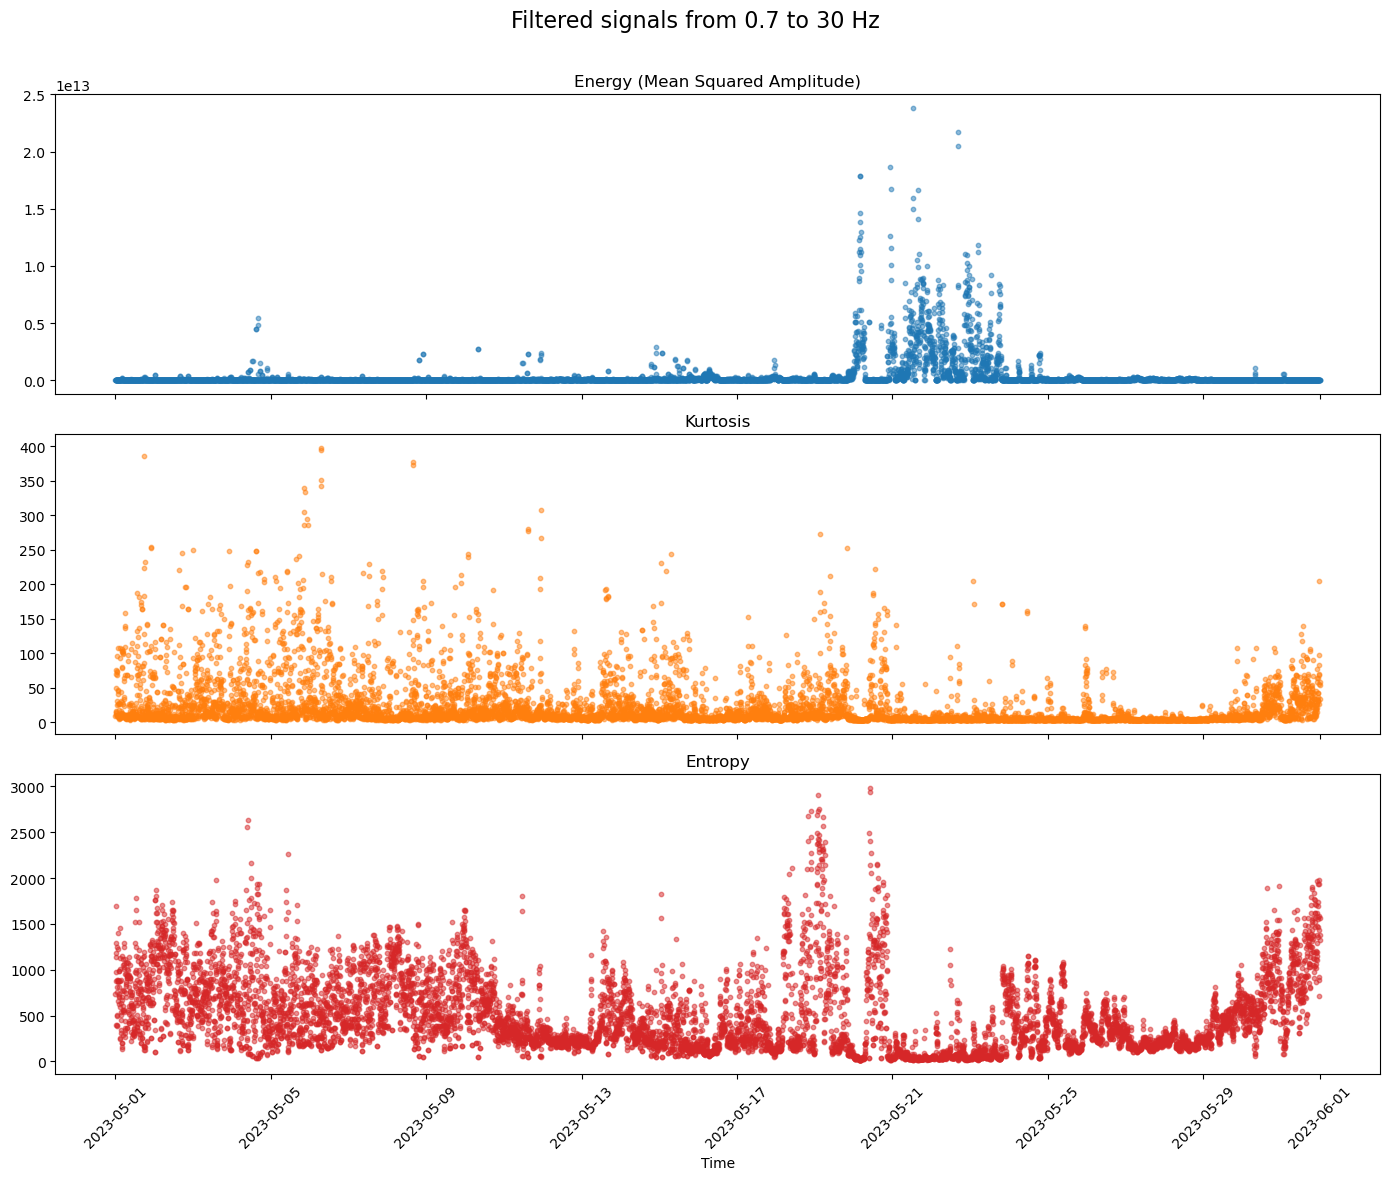

In [ ]:
# Plot the statistical features in separate subplots as dot plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=True)
fig.suptitle(f'Filtered signals from {min_freq} to {max_freq} Hz', fontsize=16)

axes[0].scatter(features_df['timestamp'], features_df['energy'], color='tab:blue', s=10, alpha=0.5)
axes[0].set_yscale('log')  # Set vertical axis to logarithmic scale
axes[0].set_title('Energy (Mean Squared Amplitude)')

axes[1].scatter(features_df['timestamp'], features_df['kurtosis'], color='tab:orange', s=10, alpha=0.5)
axes[1].set_title('Kurtosis')

axes[2].scatter(features_df['timestamp'], features_df['entropy'], color='tab:red', s=10, alpha=0.5)
axes[2].set_title('Entropy')
axes[2].set_xlabel('Time')

plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.97])

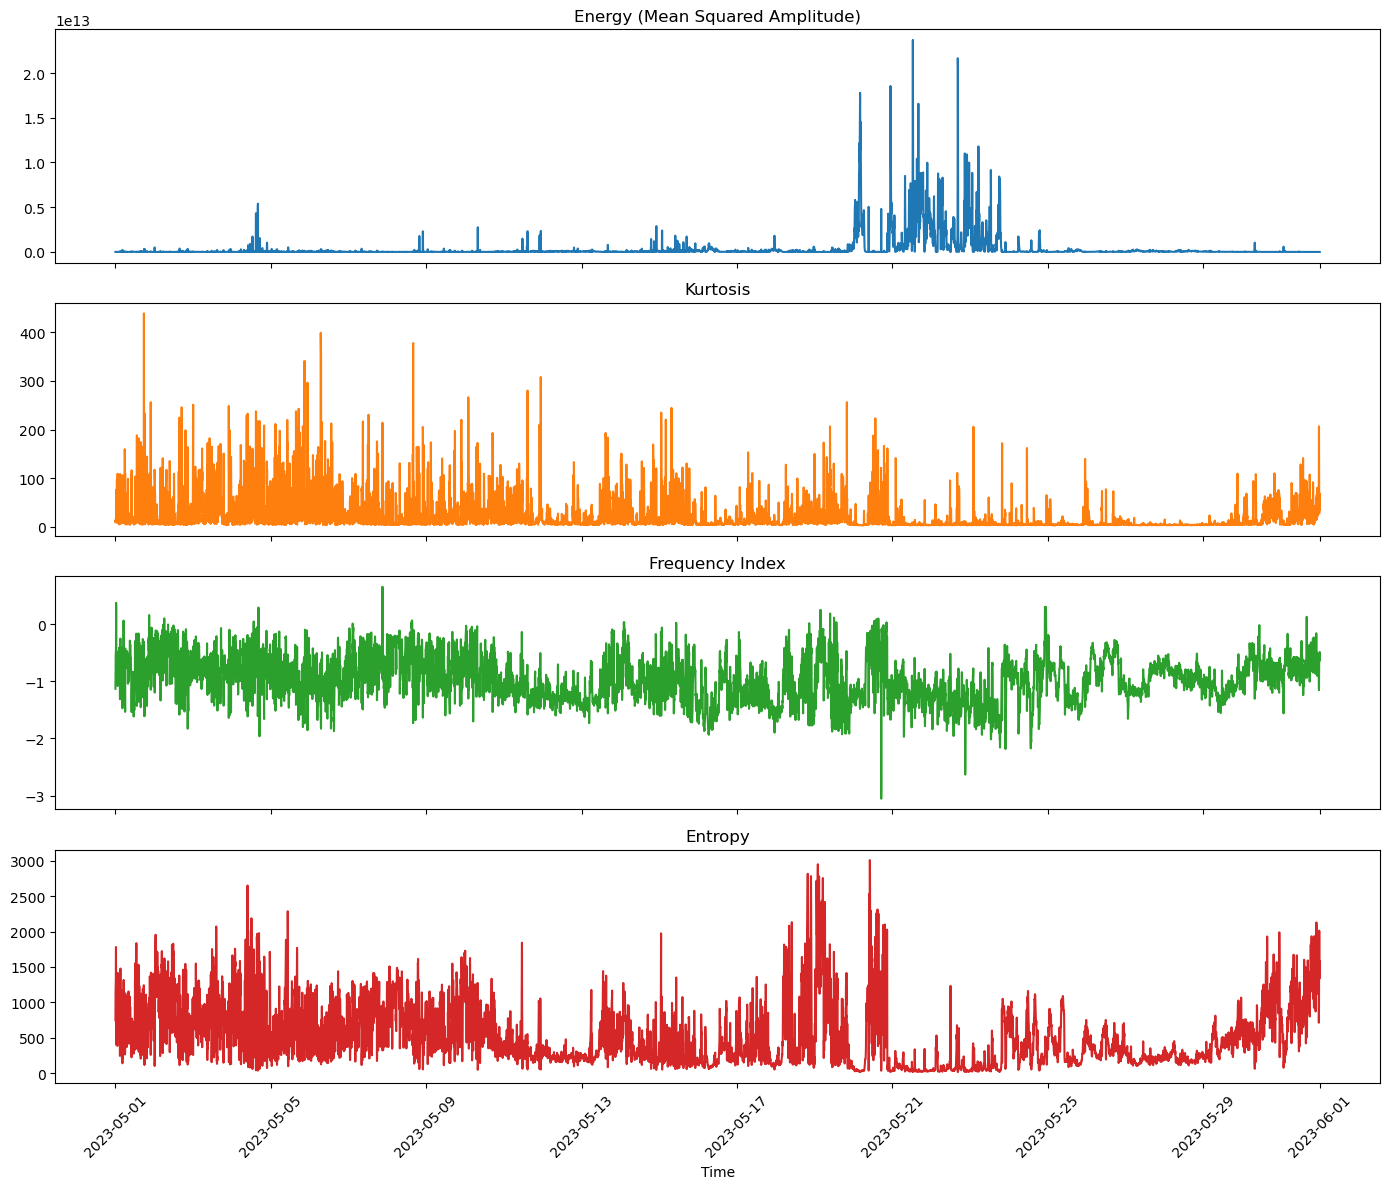

In [ ]:
"""
# Plot all four statistical features in separate subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=True)


axes[0].plot(features_df['timestamp'], features_df['energy'], color='tab:blue')
axes[0].set_title('Energy (Mean Squared Amplitude)')

axes[1].plot(features_df['timestamp'], features_df['kurtosis'], color='tab:orange')
axes[1].set_title('Kurtosis')

axes[2].plot(features_df['timestamp'], features_df['frequency_index'], color='tab:green')
axes[2].set_title('Frequency Index')

axes[3].plot(features_df['timestamp'], features_df['entropy'], color='tab:red')
axes[3].set_title('Entropy')
axes[3].set_xlabel('Time')

plt.xticks(rotation=45)
plt.tight_layout()
"""